In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from skimage.data import imread
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('/media/sree/26983D285B523AA4/clouds/train.csv')
train.head()

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...


List of labels

In [6]:
train["Label"] = train["Image_Label"].apply(lambda x: x.split("_")[1])

In [7]:
train.head()

,Image_Label,EncodedPixels,Label
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...,Fish
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...,Flower
2,0011165.jpg_Gravel,NaN,Gravel
3,0011165.jpg_Sugar,NaN,Sugar
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...,Fish


In [8]:
train.Label.unique()

array(['Fish', 'Flower', 'Gravel', 'Sugar'], dtype=object)

In [11]:
labels = list(train.Label.unique())

In [9]:
def rle_decode(mask_rle, shape=(1400, 2100)):
    '''
    mask_rle: run-length as string formatted (start length)
    shape: (height, width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape, order='F') 

In the example image 2 of the 4 labels are present. Displaying the labels present in the example image.

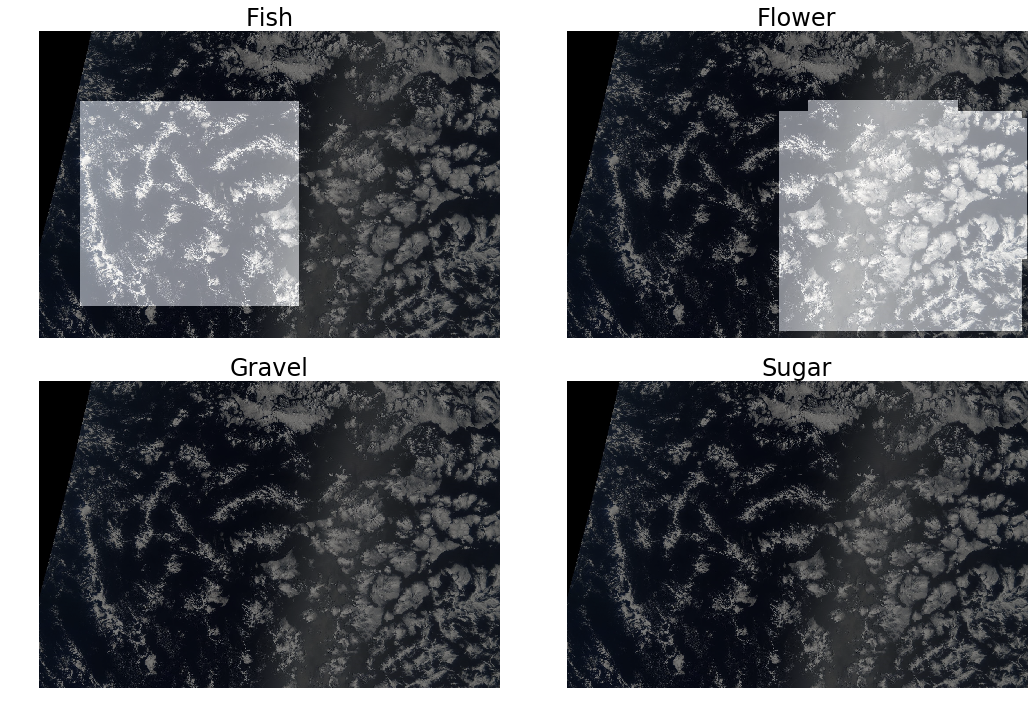

In [13]:
image_name = '0011165.jpg'
img = imread('/media/sree/26983D285B523AA4/clouds/train_imgs/' + image_name)

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for e, label in enumerate(labels):
    axarr = ax.flat[e]
    image_label = image_name + '_' + label
    mask_rle = train.loc[train['Image_Label'] == image_label, 'EncodedPixels'].values[0]
    try: # label might not be there!
        mask = rle_decode(mask_rle)
    except:
        mask = np.zeros((1400, 2100))
    axarr.axis('off')
    axarr.imshow(img)
    axarr.imshow(mask, alpha=0.5, cmap='gray')
    axarr.set_title(label, fontsize=24)
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()